In [25]:
import  pandas as pd
import numpy as np
import sklearn as sk
import  seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df_soci = pd.read_csv('datos_socioecomicos.csv')
df_soci.head()

,id_persona,genero,edad,nacionalidad,categoria_municipio,ingresos,actividad
0,1,otro,23,1,2,2485189,Estudiante
1,2,m,30,1,6,2608735,Estudiante
2,3,otro,40,1,2,6707869,Independiente
3,4,otro,26,2,4,13526365,Independiente
4,5,m,34,1,6,11332100,Ama de casa


In [6]:
df_emission = pd.read_csv('CO2 Emissions_Canada.csv')
df_emission.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


se coloca el diccionario de los tipos de combustible

In [12]:
dict_fuel_type = {
    'Z'  :'Premium',
    'X'  :'Gasoline',
    'D'  :'Diesel',
    'E' : 'Ethanol',
    'N' : 'Gas'
}

Remplazamos los valores

In [14]:
df_emission['Fuel Type'] = df_emission['Fuel Type'].replace(dict_fuel_type)
df_emission.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Premium,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Premium,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Premium,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Premium,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Premium,12.1,8.7,10.6,27,244


### Revisión de la data

In [19]:
df_soci.info()
df_soci.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_persona           8000 non-null   int64 
 1   genero               8000 non-null   object
 2   edad                 8000 non-null   int64 
 3   nacionalidad         8000 non-null   int64 
 4   categoria_municipio  8000 non-null   int64 
 5   ingresos             8000 non-null   int64 
 6   actividad            8000 non-null   object
dtypes: int64(5), object(2)
memory usage: 437.6+ KB


,id_persona,edad,nacionalidad,categoria_municipio,ingresos
count,8000.00000,8000.000000,8000.000000,8000.000000,8.000000e+03
mean,4000.50000,39.882875,1.499250,3.498000,1.170188e+07
std,2309.54541,12.894890,0.500031,1.700987,5.975466e+06
min,1.00000,18.000000,1.000000,1.000000,1.423617e+06
25%,2000.75000,29.000000,1.000000,2.000000,6.520178e+06
50%,4000.50000,40.000000,1.000000,4.000000,1.164552e+07
75%,6000.25000,51.000000,2.000000,5.000000,1.691470e+07
max,8000.00000,62.000000,2.000000,6.000000,2.199704e+07


In [20]:
df_emission.info()
df_emission.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


### Visualización de los datos

<function matplotlib.pyplot.show(close=None, block=None)>

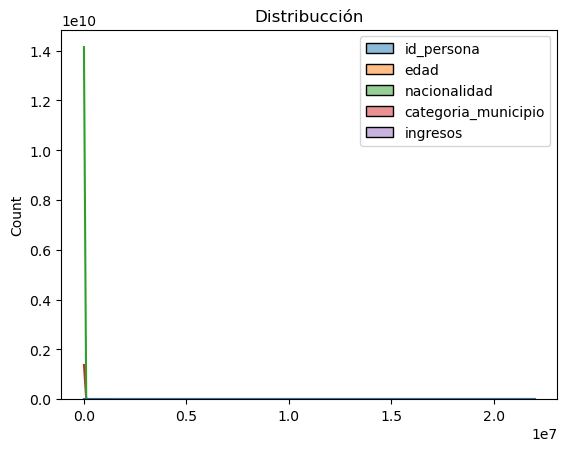

In [26]:
sns.histplot(df_soci,bins = 30, kde= True)
plt.title('Distribucción')
plt.show